## Text Summarization

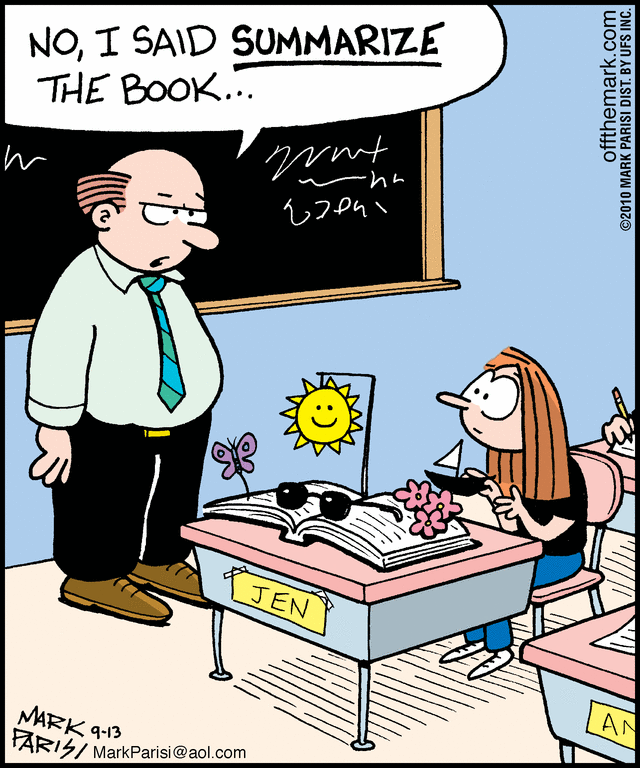

In [2]:
# Load image from local storage
Image(filename = "summarize.png", width = 600, height = 300)

Text summarization is the technique of shortening long pieces of text. The intention is to create a concise, coherent, and fluent summary which highlights only the main points of the document.

<\n>
### Why do we need  text summarization? <br>
Propelled by the modern technological innovations, data is to this century what oil was to the previous one. Today, our world is parachuted by the gathering and disseminationof huge amounts of data.
In fact, the International Data Corporation (IDC) projects that the total amount ofdigital data circulating annually around the world would sprout from 4.4 zettabytes in2013 to hit 180 zettabytes in 2025. That’s a lot of data!
With such a big amount of data circulating in the digital space, there is need to developmachine learning algorithms that can automatically shorten longer texts and deliveraccurate summaries that can fluently pass the intended messages.
Furthermore, applying text summarization reduces reading time, accelerates the processof researching for information, and increases the amount of information that can fit inan area.(Ref: A Quick Introduction to Text Summarization in Machine Learning | by Dr. Michael J. Garbade | Towards Data Science)

### Types of Text Summarization

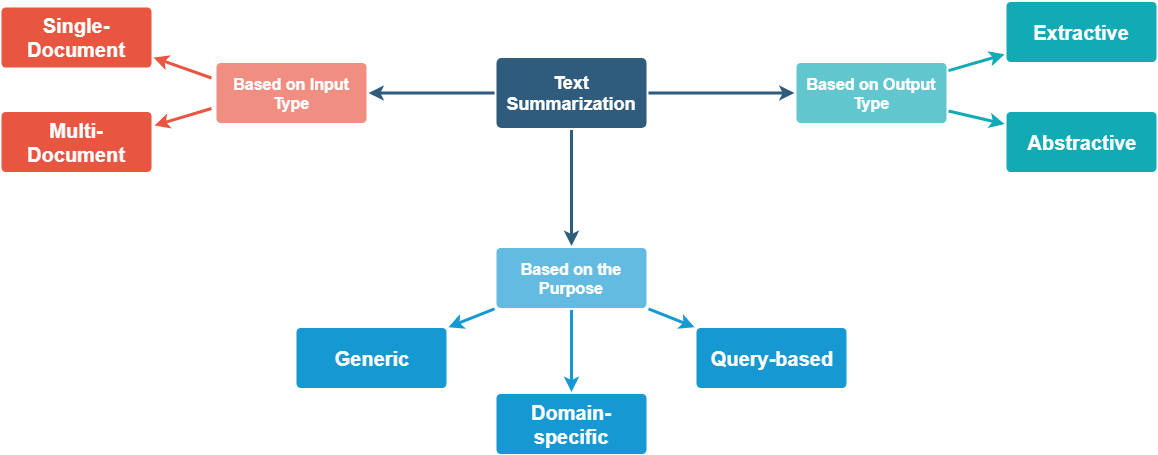


image source:https://hackernoon.com/summarization-with-wine-reviews-using-spacy-b49f18399577

**Based on the input document**
There are mainly four types of summaries:
- **Single Document Summary**: Summary of a Single Document
- **Multi-Document Summary**: Summary from multiple documents
- **Query Focused Summary**: Summary of a specific query
- **Informative Summary**: It includes a summary of the full information.<br>
ref:https://towardsdatascience.com/understanding-automatic-text-summarization-1-extractive-methods-8eb512b21ecc

**Based on output of the summary produced could be an extractive or abstractive summary.**
- **Extractive method**
Selects the n numbers of the most important sentences from the article which convey the main idea of the article. 
- **Abstractive method** 
This method uses concepts of deep learning like encoder-decoder architecture, LSTM(Long Short Term Memory) networks. As a reult of paraphrasing the text, this method may sometimes produse sentences that dont make sense.

### How does an extractive text summarization algorithm work?
(Ref:https://pkghosh.wordpress.com/2019/06/27/six-unsupervised-extractive-text-summarization-techniques-side-by-side/)
- Typically, extractive-based approaches summarize texts by:
- Spliting the document into sentences
- Pre-processing each sentence to remove noise.This includes tokenization, stop word removal, and lemmatization
- Assigning algorithmic specific score to each sentence
- Sorting the sentences in descending order of the score to retain the top n, where n is a configurable parameter.
- combining the top n sentences to form the summary.
All these algorithms follow the steps mentioned above.However,the scoring logic is different for each algorithm. 

### Diversity 
(Ref:https://pkghosh.wordpress.com/2019/06/27/six-unsupervised-extractive-text-summarization-techniques-side-by-side/)
Ideally, we want the sentences in the summary to represent the underlying concepts and and not have any redundancy. i.e.sentences should be as diverse as possible. Diversity is the opposite of similarity. Sum Basic, Latent semantic indexing and Non negative matrix factorization have redundancy reduction built into the algorithms. 

For the remaining algorithms, explicit diversification is necessary. A technique called Maximal Marginal Relevance (MMR) is used for these other algorithms, that require diversification as an extra step. 


The steps are as follows
(Ref:https://pkghosh.wordpress.com/2019/06/27/six-unsupervised-extractive-text-summarization-techniques-side-by-side/)
- Get sentences sorted in descending score from the core algorithm
- To select a sentence find diversity with respect to already selected sentence. This could be minimum, maximum or average diversity with already selected sentences.
- An weighted score is found based on the original score and the diversity score
- The sentence with the highest weighted score is selected next
- Get sentences sorted in descending score from the core algorithm
- To select a sentence find diversity with respect to already selected sentence. This could be minimum, maximum or average diversity with already selected sentences.
- An weighted score is found based on the original score and the diversity score
- The sentence with the highest weighted score is selected next


## Summary Evaluation


There are two types of evaluations:
- Human Evaluation
- Automatic Evaluation
ROUGE: ROUGE stands for Recall-Oriented Understudy for Gisting Evaluation. It is the method that determines the quality of the summary by comparing it to other summaries made by humans as a reference. The intuition behind this is if a model creates a good summary, then it must have common overlapping portions with the human references. 

ROUGE-n: It is measure on the comparison between the machine-generated output and the reference output based on n-grams. An n-gram is a contiguous sequence of n items from a given sample of text or speech, i.e, it is simply a sequence of words. Bigrams mean two words, Trigrams mean 3 words and so on. We normally use Unigrams and Bigrams.<br>
ref:https://towardsdatascience.com/understanding-automatic-text-summarization-1-extractive-methods-8eb512b21ecc

For this project, I use the Rouge metric to calculate the quality of the summary.<br>
**Python ROUGE** is a native python implementation of ROUGE, designed to replicate results from the original perl package.<br>
Ref:https://pypi.org/project/rouge-score/
### ROUGE for Python
There are ROUGE implementations available for Python, however some are not native python due to their dependency on the perl script, and others provide differing results when compared with the original implementation. This makes it difficult to directly compare with known results.

This package is designed to replicate perl results. It implements:

ROUGE-N (N-gram) scoring
ROUGE-L (Longest Common Subsequence) scoring <br>
Ref:https://pypi.org/project/rouge-score/

**For this project, I've explored the following modules and algorithms:**

- Text Rank - Word embedding GLOVE, graph and Page Rank
- Gensim - Variation of Text Rank
- NLTK  - Term frequency
- Spacy - Sci Spacy Word embedding and Term Frequency/Inverse Frequency algorithm
- BERT Sum -greedy algorithm 


### 1.  TextRank 
In Text Rank, sentence term matrix is used to cosine similarity between sentences. The similarity matrix is used to construct a graph, where sentences are nodes. Text rank algorithm is run on the graph. Embedding Text Rank is similar, except that instead of raw sentence term vector, sentence embedding vector is used to calculate similarity matrix. Sentence embedding vector is calculated by averaging embeddings of all the words in the sentence.

 Code source: https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python/


In [1]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt') # one time execution
import re
#Import library
from IPython.display import Image



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GregFlo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
entire_df = pd.read_csv("capstone_data.csv")

In [3]:
#Generate a single article from all the articles. 
text=entire_df ['text_body'][1]
text

"Introduction\n\nThe sudden emergence of severe acute respiratory syndrome (SARS) in April 2003 caused much concern and reaction. Refereed medical journals ever since have been rife with articles about SARS. The eventual containment and treatment of SARS has seen a diminution of the massive media publicity and overt public concern. However, fears have recently surfaced about the potential for re-emergence of SARS in the near future. As we confront the potential need to return to more stringent infection control measures once again, this is an appropriate time to reflect on the ethical values that underlay the strict visitation restrictions imposed in hospitals in Ontario during the SARS outbreak and the moderate restrictions in place since SARS. This reflection will facilitate future decision making with respect to visitation restrictions.\n\nWhen public health trumps civil liberties: the collateral damage associated with victims of SARS\n\nOur infectious disease colleagues are adamant

In [4]:
#Split Text into Sentences
# break the text into individual sentences. using the sent_tokenize( ) function of the nltk library to do this.
#Flattening lists means converting a multidimensional or nested list into a one-dimensional list.
from nltk.tokenize import sent_tokenize
sentences= sent_tokenize(text)




In [5]:
#Let’s print a few elements of the list sentences.

sentences[:5]

['Introduction\n\nThe sudden emergence of severe acute respiratory syndrome (SARS) in April 2003 caused much concern and reaction.',
 'Refereed medical journals ever since have been rife with articles about SARS.',
 'The eventual containment and treatment of SARS has seen a diminution of the massive media publicity and overt public concern.',
 'However, fears have recently surfaced about the potential for re-emergence of SARS in the near future.',
 'As we confront the potential need to return to more stringent infection control measures once again, this is an appropriate time to reflect on the ethical values that underlay the strict visitation restrictions imposed in hospitals in Ontario during the SARS outbreak and the moderate restrictions in place since SARS.']

In [6]:
# Extract word vectors
#GloVe is a commonly used algorithm for natural language processing (NLP). It was trained on Wikipedia and Gigawords.
#Get the word embeddings
word_embeddings = {}
f = open("D:/Capstone/glove.6B/glove.6B.300d.txt", encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [7]:
#Getting the number of word embeddings in this glove model 
len(word_embeddings)


400001

### Text Preprocessing
It is always a good practice to make your textual data noise-free as much as possible. So, let’s do some basic text cleaning.

In [8]:
# remove punctuations, numbers and special characters
clean_sentences = pd.Series(sentences).str.replace("[^a-zA-Z]", " ")

# make alphabets lowercase
clean_sentences = [s.lower() for s in clean_sentences]

In [9]:
#Get rid of the stopwords (commonly used words of a language – is, am, the, of, in, etc.) present in the sentences. 
#If you have not downloaded nltk-stopwords, then execute the following line of code:

nltk.download('stopwords')
#Now we can import the stopwords.

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#Let’s define a function to remove these stopwords from our dataset.

# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]
#We will use clean_sentences to create vectors for sentences in our data with the help of the GloVe word vectors.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GregFlo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
clean_sentences

['introduction sudden emergence severe acute respiratory syndrome sars april caused much concern reaction',
 'refereed medical journals ever since rife articles sars',
 'eventual containment treatment sars seen diminution massive media publicity overt public concern',
 'however fears recently surfaced potential emergence sars near future',
 'confront potential need return stringent infection control measures appropriate time reflect ethical values underlay strict visitation restrictions imposed hospitals ontario sars outbreak moderate restrictions place since sars',
 'reflection facilitate future decision making respect visitation restrictions',
 'public health trumps civil liberties collateral damage associated victims sars infectious disease colleagues adamant restricting movement people around hospital setting effective clinical epidemiological strategies help protect vulnerable patient population health care providers need stay healthy may care patients',
 'one might argue visitati

### Vector Representation of Sentences

In [12]:
# Extract word vectors
word_embeddings = {}
f = open("D:/Capstone/glove.6B/glove.6B.300d.txt", encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [13]:
#Now, let’s create vectors for our sentences. 
#We will first fetch vectors (each of size 100 elements) for the constituent words in a sentence and then 
#take mean/average of those vectors to arrive at a consolidated vector for the sentence.

sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((300,))) for w in i.split()])/(len(i.split())+0.003)
  else:
    v = np.zeros((300,))
  sentence_vectors.append(v)

### Similarity Matrix Preparation

In [15]:
# similarity matrix
sim_mat = np.zeros([len(sentences), len(sentences)])
#We will use Cosine Similarity to compute the similarity between a pair of sentences.

from sklearn.metrics.pairwise import cosine_similarity
#And initialize the matrix with cosine similarity scores.

for i in range(len(sentences)):
  for j in range(len(sentences)):
    if i != j:
      sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,300), sentence_vectors[j].reshape(1,300))[0,0]
 

### Applying PageRank Algorithm
Before proceeding further, let’s convert the similarity matrix sim_mat into a graph. 
The nodes of this graph will represent the sentences and the edges will represent the similarity scores between the sentences. 
On this graph, we will apply the PageRank algorithm to arrive at the sentence rankings.

In [20]:
import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)
scores = nx.pagerank(nx_graph)
 

### Summary Extraction

In [21]:
#Summary Extraction
#Finally,  extract the top N sentences based on their rankings for summary generation.
summary = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)
# Extract no1 ranked sentences as the summary
for i in range(1):
    print(summary[i][1])

It could be argued that visitation restrictions, in light of a potential outbreak of a contagious disease, are ethically sound because of the compelling need to protect public health.However, even when public health concerns trump individual liberties, the ethical operationalization of this value would demand that 'those whose rights are being infringed' need to be managed in 'an ethical and even-handed manner so that they are not unfairly or disproportionately harmed by such measures' [1].This is an important and far-reaching consideration because SARS caused collateral damage and we know that the implementation of visitation restrictions will have an impact on a broad range of individuals.


### Evaluation- Rouge N1 & N2

In [19]:
#Evaluation
#Read reference summary
ref_summary = '''Our infectious disease colleagues are adamant that restricting the movement of people into and around the hospital setting are effective clinical and epidemiological strategies that will help protect both the vulnerable patient population and health care providers themselves, 
who need to stay healthy so that they may care for their patients. In a health care institution, visitation restrictions not only affect inpatients but also have an impact on ambulatory patients who must come for diagnostic tests or interventions and who, if deprived access, might develop urgent or emergent conditions.
Feedback should be sought from those individuals who would be affected by visitation restrictions, such as staff, patients and family members.Health care workers, being in direct communication with patients and families, bear the brunt of their anger and frustration regarding any restriction in visitation.
If a family is allowed to visit a patient whose death is presumed to be imminent, then the patient's identity should be protected by using privacy strategies.
'''
summary = '''It could be argued that visitation restrictions, in light of a potential outbreak of a contagious disease, 
are ethically sound because of the compelling need to protect public health.However, even when public health concerns trump 
individual liberties, the ethical operationalization of this value would demand that 'those whose rights are being infringed' 
need to be managed in 'an ethical and even-handed manner so that they are not unfairly or disproportionately harmed by such 
measures' [1].This is an important and far-reaching consideration because SARS caused collateral damage and we know that the 
implementation of visitation restrictions will have an impact on a broad range of individuals.'''

#The abstract is the target: Text containing the target (ground truth) text.- The Gold Standard
# the summary generated is the prediction: Text containing the predicted text.


from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1','rouge2'], use_stemmer=True)
scores = scorer.score(ref_summary,summary)
                      
scores

{'rouge1': Score(precision=0.44036697247706424, recall=0.2962962962962963, fmeasure=0.3542435424354244),
 'rouge2': Score(precision=0.09259259259259259, recall=0.062111801242236024, fmeasure=0.07434944237918215)}

This is a great start. However, theres alot to explore before I settle on a single module for summarization.
- The recall value of the Rouge metric is what I am interested in, n gram value of 0.2 means that there is a 20% overlap in the unigrams of the summary generated and the written summary.
- theres a 6% overlap in the bigrams.I'd expect the bi gram value to be lower than the uni grams because the reference summary is of abstractive nature as it has been paraphrased.